# Simulation of RCT EMS v2

Want to graph:
 - Travel Times
 - Coverages

In [1]:
# %matplotlib notebook

import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from sys import argv
import scipy.stats as stats
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from numpy import median, mean
from functools import reduce
from collections import Counter
from os import listdir

import subprocess


# Execute the Simulator
## Print the results

In [2]:
commands = [
    'python3 run.py configurations/exp-scenarios/tj.yaml'
]

for c in commands:
    print(c)
    p = subprocess.Popen(c.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    p.communicate()
    print("Done.")
    

python3 run.py configurations/exp-scenarios/tj.yaml
Done.


In [3]:
results = 'results/tijuana-multi-scenario/'
csvs = []
for f in listdir(results):
    
    path = results + f
    print(path)
    p = pandas.read_csv(path)
    csvs.append(p)


results/tijuana-multi-scenario/chosen_hospitals.csv
results/tijuana-multi-scenario/processed_cases.csv
results/tijuana-multi-scenario/metrics.csv
results/tijuana-multi-scenario/chosen_ambulances.csv
results/tijuana-multi-scenario/chosen_bases.csv


In [4]:
# csvs[0]

In [5]:
# csvs[1]

In [6]:
# csvs[2]

In [7]:
# csvs[3]

In [8]:
# csvs[4]

# Want to see number of events per hour.

In [9]:
cases = csvs[1]
dates = [datetime.strptime(arr[1], '%Y-%m-%d %H:%M:%S.%f').replace(
minute=0, second=0, microsecond=0) for arr in cases.values]


In [10]:
# matplotlib does not play well with datetimes

first = dates[0]
deltas = [(date-first).total_seconds()/3600 for date in dates]


In [11]:
c = Counter(deltas)
sum(c.values()), c 

(100,
 Counter({0.0: 1,
          2.0: 1,
          8.0: 1,
          9.0: 2,
          10.0: 2,
          11.0: 3,
          12.0: 3,
          13.0: 1,
          14.0: 2,
          16.0: 3,
          17.0: 1,
          18.0: 2,
          19.0: 4,
          22.0: 1,
          23.0: 2,
          24.0: 5,
          28.0: 2,
          29.0: 1,
          30.0: 1,
          31.0: 1,
          32.0: 2,
          34.0: 1,
          35.0: 1,
          36.0: 1,
          37.0: 1,
          38.0: 1,
          39.0: 1,
          40.0: 4,
          42.0: 1,
          44.0: 2,
          45.0: 1,
          46.0: 3,
          47.0: 1,
          48.0: 1,
          49.0: 1,
          51.0: 1,
          53.0: 2,
          54.0: 1,
          56.0: 1,
          57.0: 2,
          58.0: 4,
          59.0: 2,
          60.0: 1,
          62.0: 2,
          63.0: 3,
          64.0: 2,
          65.0: 2,
          66.0: 1,
          68.0: 1,
          69.0: 3,
          70.0: 2,
          71.0: 2,
          

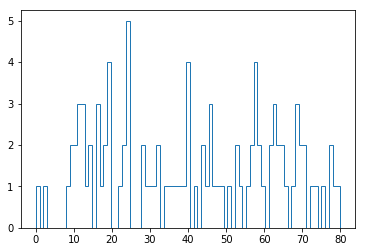

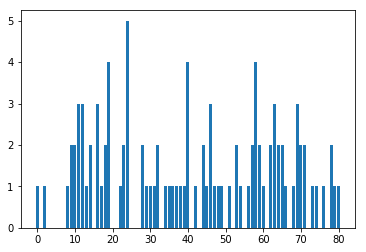

In [12]:
l = list(deltas)

plt.figure("Histogram: The number of cases per hour")
ys, xs, patches = plt.hist(deltas, bins=int((max(deltas)+1)/1), histtype='step')
plt.show()
ys = np.append(ys, [0])

plt.figure("Bar graph: The number of cases per hour")
plt.bar(c.keys(), c.values())

plt.show()


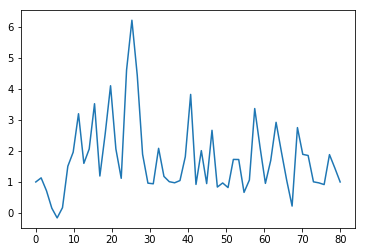

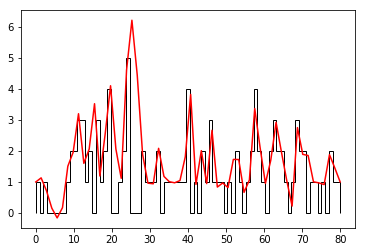

In [27]:
# Smoothed the original
smooth_xs = np.linspace(int(min(c.keys())), int(max(c.keys())), len(c.keys()))

spl = make_interp_spline(list(c.keys()), list(c.values()), k=3)
smooth_ys = spl(smooth_xs)

# plt.figure("This is the curve you were looking for.")
# plt.plot(smooth_xs, smooth_ys,)
# plt.show()

plt.figure("overlay")
plt.hist(deltas, bins=int((max(deltas)+1)), histtype='step', color='black')
plt.plot(smooth_xs, smooth_ys, '-', color='red')

plt.show()


# Want to see the number of cases that have been reached within r1 and r2

In [14]:
# to incident durations
durations = [pandas.to_timedelta(array[7]) for array in  cases.values]
r1 = timedelta(minutes=10)
r2 = timedelta(minutes=14)

In [15]:
times = {
    'lt_r1' : list(filter(lambda t: t <  r1, durations)),
    'lt_r2' : list(filter(lambda t: t <  r2, durations)),
    'beyond': list(filter(lambda t: t >= r2, durations)),
}

counts = {k:len(v) for k,v in times.items()}
counts

{'lt_r1': 74, 'lt_r2': 95, 'beyond': 5}

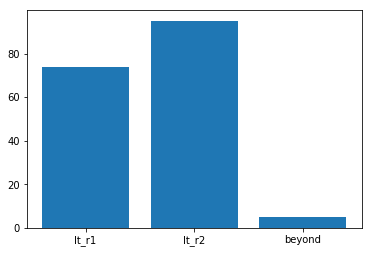

In [16]:
plt.figure("Travel times for the TO_INCIDENT events ")

plt.bar(counts.keys(), counts.values())

plt.show()

# Want to plot the histogram for the coverage

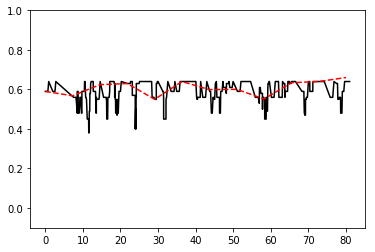

In [37]:
metrics = csvs[2]
coverages = [(pandas.to_datetime(arr[0]), float(arr[1])) for arr in metrics.values]

xs = [cov[0] for cov in coverages]
ys = [cov[1] for cov in coverages]

# list(map(print, xs))
# list(map(print, ys))

first = xs[0]
xs = [(date-first).total_seconds()/3600 for date in xs]

# Smoothed the original
smooth_xs = np.linspace(int(min(xs)), int(max(xs)), len(xs)//50)

spl = make_interp_spline(xs, ys, k=3)
smooth_ys = spl(smooth_xs)


plt.figure("Coverages over time ")
plt.ylim(-0.1, 1.0)
plt.plot(xs, ys, 'black')
plt.plot(smooth_xs, smooth_ys, '--', color='red')
plt.show()

## Read data and organize

Read as a list of dicts so that the same index/object is used for each row.

In [18]:
# Read pandas CSV file 
def read_csv_as_list_of_dicts(filename):
    return 

In [19]:
# Read the specific files
filenames = [
    ""
]

## Restructure the data that is easy for the matplotlib
Want lists of xs and ys.

In [20]:
def restructure_times():
    return

In [21]:
def restructure_coverage():
    return

## Plot them. 
Want multiple plots per graph. Request asked for 1 graph, but still seems to make sense to have 4 graphs.

In [22]:
def plot_times():
    return

In [23]:
def plot_coverage():
    return